In [ ]:
import random
import numpy as np
import pandas as pd
import seaborn as sns

from mlxtend.evaluate import permutation_test  # pip install mlxtend

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.preview'] = True
plt.rc('font', family='serif', serif=['Times'])

In [2]:
gray = sns.color_palette("Set2")[-1]
green1 = sns.color_palette("Paired")[2]
green2 = sns.color_palette("Paired")[3]
mypal = [gray, green1, green2]

In [3]:
name2short = {
    'vilbert': '$\\mathrm{\\textsc{ViL}}$',
    'lxmert': '$\\mathrm{\\textsc{LX}}$',
    'vl-bert': '$\\mathrm{\\textsc{VL}}$',
    'visualbert': '$\\mathrm{\\textsc{Vis}}$',
    'uniter': '$\\mathrm{\\textsc{UNI}}$'
}

/Users/plz563/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The make_dvi_preview function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  # This is added back by InteractiveShellApp.init_path()
/Users/plz563/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The make_dvi_preview function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  # This is added back by InteractiveShellApp.init_path()
/Users/plz563/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The make_dvi_preview function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  # This is added back by InteractiveShellApp.init_path()


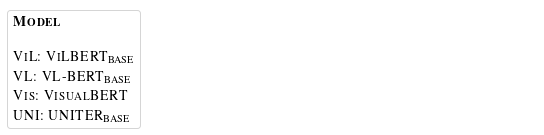

In [4]:
f, ax = plt.subplots(figsize=(5,2))
ax.plot([], [], color='gray', linestyle='None', label='$\\textbf{\\textsc{Model}}$\n')
ax.plot([], [], color='gray', linestyle='None', label=list(name2short.values())[0] + ': ' + models[0])
ax.plot([], [], color='gray', linestyle='None', label=list(name2short.values())[2] + ': ' + models[2])
ax.plot([], [], color='gray', linestyle='None', label=list(name2short.values())[3] + ': ' + models[3])
ax.plot([], [], color='gray', linestyle='None', label=list(name2short.values())[4] + ': ' + models[4])
leg1 = ax.legend(ncol=1,scatterpoints=1, fontsize=14, loc='upper right', bbox_to_anchor=(-0.4, 1.03), handletextpad=-2)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)
plt.savefig('legend_perm.pdf', bbox_inches='tight')

## VQA

In [4]:
vilbert = {0 : 68.90, 1234 : 68.71, 27 : 68.85, 33 : 68.97, 42 : 68.75, 54 : 68.83, 69 : 68.73, 73 : 68.77, 89 : 68.69, 93 : 68.90}
lxmert = {0 : 67.52, 1234 : 67.52, 27 : 67.73, 33 : 67.50, 42 : 67.08, 54 : 67.40, 69 : 67.66, 73 : 67.64, 89 : 67.46, 93 : 67.51}
vlbert = {0 : 68.04, 1234 : 68.16, 27 : 68.72, 33 : 68.29, 42 : 68.33, 54 : 68.37, 69 : 68.24, 73 : 67.97, 89 : 68.23, 93 : 67.96}
visualbert = {0 : 68.66, 1234 : 69.03, 27 : 68.65, 33 : 68.53, 42 : 68.20, 54 : 68.85, 69 : 68.77, 73 : 68.59, 89 : 68.55, 93 : 68.66}
uniter = {0 : 68.70, 1234 : 68.38, 27 : 68.92, 33 : 68.30, 42 : 68.84, 54 : 68.22, 69 : 68.14, 73 : 68.67, 89 : 68.80, 93 : 68.73}

df = pd.DataFrame(data=[vilbert, lxmert, vlbert, visualbert, uniter], index=['vilbert', 'lxmert', 'vl-bert', 'visualbert', 'uniter'])
df

,0,1234,27,33,42,54,69,73,89,93
vilbert,68.90,68.71,68.85,68.97,68.75,68.83,68.73,68.77,68.69,68.90
lxmert,67.52,67.52,67.73,67.50,67.08,67.40,67.66,67.64,67.46,67.51
vl-bert,68.04,68.16,68.72,68.29,68.33,68.37,68.24,67.97,68.23,67.96
visualbert,68.66,69.03,68.65,68.53,68.20,68.85,68.77,68.59,68.55,68.66
uniter,68.70,68.38,68.92,68.30,68.84,68.22,68.14,68.67,68.80,68.73


In [5]:
ll_vqa = [list(vilbert.values()), list(vlbert.values()), list(visualbert.values()), list(uniter.values())]
names = ['vilbert', 'vl-bert', 'visualbert', 'uniter']

p_val = 0.005
pvals_vqa = np.ones((len(names), len(names)))
signs_vqa = np.zeros((len(names), len(names)))
num_tests = sum(1 if i != j else 0 for i in range(0, len(ll_vqa)) for j in range(i, len(ll_vqa)))

for i in range(0, len(ll_vqa)):
    for j in range(i, len(ll_vqa)):
        if i != j:
            p_value = permutation_test(ll_vqa[i], ll_vqa[j], method='exact', seed=0)
            p_bonf = p_value * num_tests
            pvals_vqa[i, j] = p_value
            pvals_vqa[j, i] = p_value
            signs_vqa[i, j] = p_bonf < p_val
            signs_vqa[j, i] = p_bonf < p_val

/Users/plz563/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: MatplotlibDeprecationWarning: 
The make_dvi_preview function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.


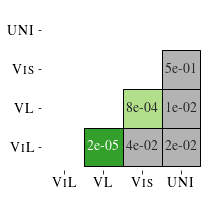

In [8]:
f, ax = plt.subplots(figsize=(6,3))

mask = np.tri(signs_vqa.shape[0], k=-1)
mask[0,0] = 1
mask[1,1] = 1
mask[2,2] = 1
mask[3,3] = 1

signs_vqa[0,1] = 2
signs_vqa[1,2] = 1
    
ax = sns.heatmap(signs_vqa, mask=mask, ax=ax, cmap=mypal, square=True, 
                 cbar=False, linecolor='gray', annot=pvals_vqa, fmt=".0e", annot_kws={"fontsize": 14})

# rec = plt.Rectangle((0,0),1,1, fill=False, hatch="\\", edgecolor="k", lw=1)
# ax.add_artist(rec)
# rec = plt.Rectangle((1,1),1,1, fill=False, hatch="\\", edgecolor="k", lw=1)
# ax.add_artist(rec)
# rec = plt.Rectangle((2,2),1,1, fill=False, hatch="\\", edgecolor="k", lw=1)
# ax.add_artist(rec)
# rec = plt.Rectangle((3,3),1,1, fill=False, hatch="\\", edgecolor="k", lw=1)
# ax.add_artist(rec)

rec = plt.Rectangle((1,0),1,1, fill=False, hatch="", edgecolor="k", lw=1)
ax.add_artist(rec)
rec = plt.Rectangle((2,0),1,1, fill=False, hatch="", edgecolor="k", lw=1)
ax.add_artist(rec)
rec = plt.Rectangle((3,0),1,1, fill=False, hatch="", edgecolor="k", lw=1)
ax.add_artist(rec)
rec = plt.Rectangle((2,1),1,1, fill=False, hatch="", edgecolor="k", lw=1)
ax.add_artist(rec)
rec = plt.Rectangle((3,2),1,1, fill=False, hatch="", edgecolor="k", lw=1)
ax.add_artist(rec)
rec = plt.Rectangle((3,1),1,1, fill=False, hatch="", edgecolor="k", lw=1)
ax.add_artist(rec)

ax.set_xlim(-0.1, 4.1)
ax.set_ylim(-0.1, 4.1)

ax.set_xticks([.5+x for x in range(len(names))])
ax.set_xticklabels([name2short[n] for n in names], fontsize=14, rotation=0)
ax.set_yticks([.5+x for x in range(len(names))])
ax.set_yticklabels([name2short[n] for n in names], fontsize=14, rotation=0);

plt.savefig('vqa_perm4.pdf', bbox_inches='tight')

## RefCOCO+

In [9]:
vilbert = {0 : 70.84, 1234 : 70.57, 27 : 70.95, 33 : 70.53, 42 : 71.41, 54 : 71.31, 69 : 70.87, 73 : 71.11, 89 : 71.07, 93 : 70.81}
lxmert = {0 : 70.49, 1234 : 70.40, 27 : 69.91, 33 : 70.14, 42 : 68.84, 54 : 69.81, 69 : 69.84, 73 : 70.20, 89 : 69.83, 93 : 70.04}
vlbert = {0 : 71.39, 1234 : 71.16, 27 : 71.46, 33 : 71.20, 42 : 71.07, 54 : 71.15, 69 : 70.84, 73 : 70.82, 89 : 71.23, 93 : 71.23}
visualbert = {0 : 69.67, 1234 : 70.02, 27 : 70.01, 33 : 69.51, 42 : 69.68, 54 : 69.83, 69 : 69.90, 73 : 70.25, 89 : 69.54, 93 : 69.40}
uniter = {0 : 71.62, 1234 : 71.88, 27 : 71.49, 33 : 71.61, 42 : 71.95, 54 : 71.59, 69 : 71.63, 73 : 71.45, 89 : 71.80, 93 : 71.50}

df = pd.DataFrame(data=[vilbert, lxmert, vlbert, visualbert, uniter], index=['vilbert', 'lxmert', 'vl-bert', 'visualbert', 'uniter'])
df

,0,1234,27,33,42,54,69,73,89,93
vilbert,70.84,70.57,70.95,70.53,71.41,71.31,70.87,71.11,71.07,70.81
lxmert,70.49,70.40,69.91,70.14,68.84,69.81,69.84,70.20,69.83,70.04
vl-bert,71.39,71.16,71.46,71.20,71.07,71.15,70.84,70.82,71.23,71.23
visualbert,69.67,70.02,70.01,69.51,69.68,69.83,69.90,70.25,69.54,69.40
uniter,71.62,71.88,71.49,71.61,71.95,71.59,71.63,71.45,71.80,71.50


In [10]:
ll_ref = [list(vilbert.values()), list(vlbert.values()), list(visualbert.values()), list(uniter.values())]
names = ['vilbert', 'vl-bert', 'visualbert', 'uniter']

p_val = 0.005
pvals_ref = np.ones((len(names), len(names)))
signs_ref = np.zeros((len(names), len(names)))
num_tests = sum(1 if i != j else 0 for i in range(0, len(ll_ref)) for j in range(i, len(ll_ref)))

for i in range(0, len(ll_ref)):
    for j in range(i, len(ll_ref)):
        if i != j:
            p_value = permutation_test(ll_ref[i], ll_ref[j], method='exact', seed=0)
            p_bonf = p_value * num_tests
            pvals_ref[i, j] = p_value
            pvals_ref[j, i] = p_value
            signs_ref[i, j] = p_bonf < p_val
            signs_ref[j, i] = p_bonf < p_val

/Users/plz563/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: 
The make_dvi_preview function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.


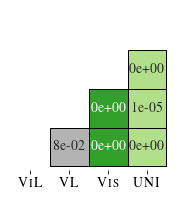

In [11]:
f, ax = plt.subplots(figsize=(6,3))

mask = np.tri(signs_ref.shape[0], k=-1)
mask[0,0] = 1
mask[1,1] = 1
mask[2,2] = 1
mask[3,3] = 1

signs_ref[0,2] = 2
signs_ref[1,2] = 2

ax = sns.heatmap(signs_ref, mask=mask, ax=ax, cmap=mypal, square=True, 
                 cbar=False, linecolor='gray', annot=pvals_ref, fmt=".0e", annot_kws={"fontsize": 14})

# rec = plt.Rectangle((0,0),1,1, fill=False, hatch="\\", edgecolor="k", lw=1)
# ax.add_artist(rec)
# rec = plt.Rectangle((1,1),1,1, fill=False, hatch="\\", edgecolor="k", lw=1)
# ax.add_artist(rec)
# rec = plt.Rectangle((2,2),1,1, fill=False, hatch="\\", edgecolor="k", lw=1)
# ax.add_artist(rec)
# rec = plt.Rectangle((3,3),1,1, fill=False, hatch="\\", edgecolor="k", lw=1)
# ax.add_artist(rec)

rec = plt.Rectangle((1,0),1,1, fill=False, hatch="", edgecolor="k", lw=1)
ax.add_artist(rec)
rec = plt.Rectangle((2,0),1,1, fill=False, hatch="", edgecolor="k", lw=1)
ax.add_artist(rec)
rec = plt.Rectangle((3,0),1,1, fill=False, hatch="", edgecolor="k", lw=1)
ax.add_artist(rec)
rec = plt.Rectangle((2,1),1,1, fill=False, hatch="", edgecolor="k", lw=1)
ax.add_artist(rec)
rec = plt.Rectangle((3,2),1,1, fill=False, hatch="", edgecolor="k", lw=1)
ax.add_artist(rec)
rec = plt.Rectangle((3,1),1,1, fill=False, hatch="", edgecolor="k", lw=1)
ax.add_artist(rec)

ax.set_xlim(-0.1, 4.1)
ax.set_ylim(-0.1, 4.1)

ax.set_xticks([.5+x for x in range(len(names))])
ax.set_xticklabels([name2short[n] for n in names], fontsize=14, rotation=0)
ax.set_yticks([])

plt.savefig('ref_perm4.pdf', bbox_inches='tight')

## NLVR2

In [12]:
vilbert = {0 : 71.87, 1234 : 71.91, 27 : 71.51, 33 : 72.24, 42 : 72.38, 54 : 72.57, 69 : 71.60, 73 : 71.93, 89 : 72.71, 93 : 71.72}
lxmert = {0 : 71.09, 1234 : 70.76, 27 : 68.87, 33 : 69.40, 42 : 69.07, 54 : 69.51, 69 : 69.69, 73 : 69.26, 89 : 69.64, 93 : 70.19}
vlbert = {0 : 72.31, 1234 : 72.57, 27 : 72.90, 33 : 73.19, 42 : 72.61, 54 : 73.20, 69 : 73.37, 73 : 73.04, 89 : 73.22, 93 : 72.66}
visualbert = {0 : 71.82, 1234 : 72.70, 27 : 72.61, 33 : 71.22, 42 : 71.34, 54 : 71.25, 69 : 72.03, 73 : 72.27, 89 : 72.87, 93 : 72.67}
uniter = {0 : 72.05, 1234 : 73.26, 27 : 73.36, 33 : 73.49, 42 : 72.94, 54 : 74.16, 69 : 72.57, 73 : 73.73, 89 : 73.30, 93 : 73.39}

df = pd.DataFrame(data=[vilbert, lxmert, vlbert, visualbert, uniter], index=['vilbert', 'lxmert', 'vl-bert', 'visualbert', 'uniter'])
df

,0,1234,27,33,42,54,69,73,89,93
vilbert,71.87,71.91,71.51,72.24,72.38,72.57,71.60,71.93,72.71,71.72
lxmert,71.09,70.76,68.87,69.40,69.07,69.51,69.69,69.26,69.64,70.19
vl-bert,72.31,72.57,72.90,73.19,72.61,73.20,73.37,73.04,73.22,72.66
visualbert,71.82,72.70,72.61,71.22,71.34,71.25,72.03,72.27,72.87,72.67
uniter,72.05,73.26,73.36,73.49,72.94,74.16,72.57,73.73,73.30,73.39


In [13]:
ll_nlvr = [list(vilbert.values()), list(vlbert.values()), list(visualbert.values()), list(uniter.values())]
names = ['vilbert', 'vl-bert', 'visualbert', 'uniter']

p_val = 0.005
pvals_nlvr = np.ones((len(names), len(names)))
signs_nlvr = np.zeros((len(names), len(names)))
num_tests = sum(1 if i != j else 0 for i in range(0, len(ll_nlvr)) for j in range(i, len(ll_nlvr)))

for i in range(0, len(ll_nlvr)):
    for j in range(i, len(ll_nlvr)):
        if i != j:
            p_value = permutation_test(ll_nlvr[i], ll_nlvr[j], method='exact', seed=0)
            p_bonf = p_value * num_tests
            pvals_nlvr[i, j] = p_value
            pvals_nlvr[j, i] = p_value
            signs_nlvr[i, j] = p_bonf < p_val
            signs_nlvr[j, i] = p_bonf < p_val

/Users/plz563/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: 
The make_dvi_preview function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.


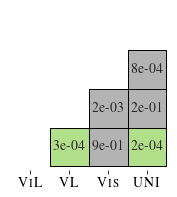

In [14]:
f, ax = plt.subplots(figsize=(6,3))

mask = np.tri(signs_nlvr.shape[0], k=-1)
mask[0,0] = 1
mask[1,1] = 1
mask[2,2] = 1
mask[3,3] = 1
    
ax = sns.heatmap(signs_nlvr, mask=mask, ax=ax, cmap=mypal[0:2], square=True, 
                 cbar=False, linecolor='gray', annot=pvals_nlvr, fmt=".0e", annot_kws={"fontsize": 14})

# rec = plt.Rectangle((0,0),1,1, fill=False, hatch="\\", edgecolor="k", lw=1)
# ax.add_artist(rec)
# rec = plt.Rectangle((1,1),1,1, fill=False, hatch="\\", edgecolor="k", lw=1)
# ax.add_artist(rec)
# rec = plt.Rectangle((2,2),1,1, fill=False, hatch="\\", edgecolor="k", lw=1)
# ax.add_artist(rec)
# rec = plt.Rectangle((3,3),1,1, fill=False, hatch="\\", edgecolor="k", lw=1)
# ax.add_artist(rec)

rec = plt.Rectangle((1,0),1,1, fill=False, hatch="", edgecolor="k", lw=1)
ax.add_artist(rec)
rec = plt.Rectangle((2,0),1,1, fill=False, hatch="", edgecolor="k", lw=1)
ax.add_artist(rec)
rec = plt.Rectangle((3,0),1,1, fill=False, hatch="", edgecolor="k", lw=1)
ax.add_artist(rec)
rec = plt.Rectangle((2,1),1,1, fill=False, hatch="", edgecolor="k", lw=1)
ax.add_artist(rec)
rec = plt.Rectangle((3,2),1,1, fill=False, hatch="", edgecolor="k", lw=1)
ax.add_artist(rec)
rec = plt.Rectangle((3,1),1,1, fill=False, hatch="", edgecolor="k", lw=1)
ax.add_artist(rec)

ax.set_xlim(-0.1, 4.1)
ax.set_ylim(-0.1, 4.1)

ax.set_xticks([.5+x for x in range(len(names))])
ax.set_xticklabels([name2short[n] for n in names], fontsize=14, rotation=0)
ax.set_yticks([])

plt.savefig('nlvr_perm4.pdf', bbox_inches='tight')

## Flickr30k

In [15]:
vilbert_ir = {0 : 59.60, 1234 : 59.62, 27 : 60.94, 33 : 60.34, 42 : 59.82, 54 : 59.30, 69 : 61.24, 73 : 60.44, 89 : 60.78, 93 : 59.52}
vilbert_tr = {0 : 75.00, 1234 : 75.80, 27 : 76.90, 33 : 78.80, 42 : 76.70, 54 : 75.50, 69 : 77.30, 73 : 77.10, 89 : 76.50, 93 : 76.70}
lxmert_ir = {0 : 58.62, 1234 : 57.76, 27 : 55.36, 33 : 55.60, 42 : 50.36, 54 : 58.20, 69 : 55.92, 73 : 56.52, 89 : 56.64, 93 : 57.84}
lxmert_tr = {0 : 74.90, 1234 : 72.90, 27 : 71.30, 33 : 71.60, 42 : 62.50, 54 : 73.70, 69 : 70.10, 73 : 72.30, 89 : 72.20, 93 : 73.50}
vlbert_ir = {0 : 54.72, 1234 : 54.40, 27 : 57.26, 33 : 56.76, 42 : 57.92, 54 : 56.94, 69 : 55.14, 73 : 56.68, 89 : 57.62, 93 : 56.12}
vlbert_tr = {0 : 67.50, 1234 : 69.20, 27 : 70.80, 33 : 70.40, 42 : 68.50, 54 : 69.80, 69 : 71.30, 73 : 71.00, 89 : 70.90, 93 : 70.70}
visualbert_ir = {0 : 58.04, 1234 : 61.48, 27 : 58.98, 33 : 57.06, 42 : 61.06, 54 : 58.32, 69 : 58.90, 73 : 60.68, 89 : 58.16, 93 : 54.06}
visualbert_tr = {0 : 74.80, 1234 : 75.20, 27 : 71.50, 33 : 72.50, 42 : 75.50, 54 : 74.00, 69 : 72.80, 73 : 75.60, 89 : 71.30, 93 : 68.50}
uniter_ir = {0 : 60.74, 1234 : 58.26, 27 : 59.10, 33 : 58.72, 42 : 60.92, 54 : 57.88, 69 : 57.76, 73 : 60.54, 89 : 59.68, 93 : 59.94}
uniter_tr = {0 : 75.30, 1234 : 72.50, 27 : 73.20, 33 : 72.10, 42 : 74.20, 54 : 72.60, 69 : 72.90, 73 : 76.40, 89 : 73.50, 93 : 74.90}

df = pd.DataFrame()
df['type'] = (['IR']*10 + ['TR']*10)*5
df['model'] = ['vilbert']*10*2 + ['lxmert']*10*2 + ['vl-bert']*10*2 + ['visualbert']*10*2 + ['uniter']*10*2
df['values'] = list(vilbert_ir.values()) + list(vilbert_tr.values()) + list(lxmert_ir.values()) + list(lxmert_tr.values()) + \
               list(vlbert_ir.values()) + list(vlbert_tr.values()) + list(visualbert_ir.values()) + list(visualbert_tr.values()) + \
               list(uniter_ir.values()) + list(uniter_tr.values())

### IR

In [16]:
ll_ir = [list(vilbert_ir.values()), list(vlbert_ir.values()), list(visualbert_ir.values()), list(uniter_ir.values())]
names = ['vilbert', 'vl-bert', 'visualbert', 'uniter']

p_val = 0.005
pvals_ir = np.ones((len(names), len(names)))
signs_ir = np.zeros((len(names), len(names)))
num_tests = sum(1 if i != j else 0 for i in range(0, len(ll_ir)) for j in range(i, len(ll_ir)))

for i in range(0, len(ll_ir)):
    for j in range(i, len(ll_ir)):
        if i != j:
            p_value = permutation_test(ll_ir[i], ll_ir[j], method='exact', seed=0)
            p_bonf = p_value * num_tests
            pvals_ir[i, j] = p_value
            pvals_ir[j, i] = p_value
            signs_ir[i, j] = p_bonf < p_val
            signs_ir[j, i] = p_bonf < p_val

/Users/plz563/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: MatplotlibDeprecationWarning: 
The make_dvi_preview function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.


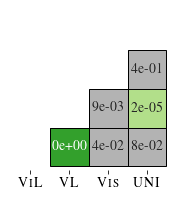

In [17]:
f, ax = plt.subplots(figsize=(6,3))

mask = np.tri(signs_ir.shape[0], k=-1)
mask[0,0] = 1
mask[1,1] = 1
mask[2,2] = 1
mask[3,3] = 1

signs_ir[0,1] = 2
    
ax = sns.heatmap(signs_ir, mask=mask, ax=ax, cmap=mypal, square=True, 
                 cbar=False, linecolor='gray', annot=pvals_ir, fmt=".0e", annot_kws={"fontsize": 14})

# rec = plt.Rectangle((0,0),1,1, fill=False, hatch="\\", edgecolor="k", lw=1)
# ax.add_artist(rec)
# rec = plt.Rectangle((1,1),1,1, fill=False, hatch="\\", edgecolor="k", lw=1)
# ax.add_artist(rec)
# rec = plt.Rectangle((2,2),1,1, fill=False, hatch="\\", edgecolor="k", lw=1)
# ax.add_artist(rec)
# rec = plt.Rectangle((3,3),1,1, fill=False, hatch="\\", edgecolor="k", lw=1)
# ax.add_artist(rec)

rec = plt.Rectangle((1,0),1,1, fill=False, hatch="", edgecolor="k", lw=1)
ax.add_artist(rec)
rec = plt.Rectangle((2,0),1,1, fill=False, hatch="", edgecolor="k", lw=1)
ax.add_artist(rec)
rec = plt.Rectangle((3,0),1,1, fill=False, hatch="", edgecolor="k", lw=1)
ax.add_artist(rec)
rec = plt.Rectangle((2,1),1,1, fill=False, hatch="", edgecolor="k", lw=1)
ax.add_artist(rec)
rec = plt.Rectangle((3,2),1,1, fill=False, hatch="", edgecolor="k", lw=1)
ax.add_artist(rec)
rec = plt.Rectangle((3,1),1,1, fill=False, hatch="", edgecolor="k", lw=1)
ax.add_artist(rec)

ax.set_xlim(-0.1, 4.1)
ax.set_ylim(-0.1, 4.1)

ax.set_xticks([.5+x for x in range(len(names))])
ax.set_xticklabels([name2short[n] for n in names], fontsize=14, rotation=0)
ax.set_yticks([])

plt.savefig('ir_perm4.pdf', bbox_inches='tight')

### TR

In [19]:
ll_tr = [list(vilbert_tr.values()), list(vlbert_tr.values()), list(visualbert_tr.values()), list(uniter_tr.values())]
names = ['vilbert', 'vl-bert', 'visualbert', 'uniter']

p_val = 0.005
pvals_tr = np.ones((len(names), len(names)))
signs_tr = np.zeros((len(names), len(names)))
num_tests = sum(1 if i != j else 0 for i in range(0, len(ll_tr)) for j in range(i, len(ll_tr)))

for i in range(0, len(ll_tr)):
    for j in range(i, len(ll_tr)):
        if i != j:
            p_value = permutation_test(ll_tr[i], ll_tr[j], method='exact', seed=0)
            p_bonf = p_value * num_tests
            pvals_tr[i, j] = p_value
            pvals_tr[j, i] = p_value
            signs_tr[i, j] = p_bonf < p_val
            signs_tr[j, i] = p_bonf < p_val

/Users/plz563/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: MatplotlibDeprecationWarning: 
The make_dvi_preview function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.


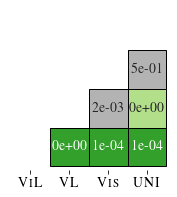

In [20]:
f, ax = plt.subplots(figsize=(6,3))

mask = np.tri(signs_tr.shape[0], k=-1)
mask[0,0] = 1
mask[1,1] = 1
mask[2,2] = 1
mask[3,3] = 1

signs_tr[0,1] = 2
signs_tr[0,2] = 2
signs_tr[0,3] = 2
    
ax = sns.heatmap(signs_tr, mask=mask, ax=ax, cmap=mypal, square=True, 
                 cbar=False, linecolor='gray', annot=pvals_tr, fmt=".0e", annot_kws={"fontsize": 14})

# rec = plt.Rectangle((0,0),1,1, fill=False, hatch="\\", edgecolor="k", lw=1)
# ax.add_artist(rec)
# rec = plt.Rectangle((1,1),1,1, fill=False, hatch="\\", edgecolor="k", lw=1)
# ax.add_artist(rec)
# rec = plt.Rectangle((2,2),1,1, fill=False, hatch="\\", edgecolor="k", lw=1)
# ax.add_artist(rec)
# rec = plt.Rectangle((3,3),1,1, fill=False, hatch="\\", edgecolor="k", lw=1)
# ax.add_artist(rec)

rec = plt.Rectangle((1,0),1,1, fill=False, hatch="", edgecolor="k", lw=1)
ax.add_artist(rec)
rec = plt.Rectangle((2,0),1,1, fill=False, hatch="", edgecolor="k", lw=1)
ax.add_artist(rec)
rec = plt.Rectangle((3,0),1,1, fill=False, hatch="", edgecolor="k", lw=1)
ax.add_artist(rec)
rec = plt.Rectangle((2,1),1,1, fill=False, hatch="", edgecolor="k", lw=1)
ax.add_artist(rec)
rec = plt.Rectangle((3,2),1,1, fill=False, hatch="", edgecolor="k", lw=1)
ax.add_artist(rec)
rec = plt.Rectangle((3,1),1,1, fill=False, hatch="", edgecolor="k", lw=1)
ax.add_artist(rec)

ax.set_xlim(-0.1, 4.1)
ax.set_ylim(-0.1, 4.1)

ax.set_xticks([.5+x for x in range(len(names))])
ax.set_xticklabels([name2short[n] for n in names], fontsize=14, rotation=0)
ax.set_yticks([])

plt.savefig('tr_perm4.pdf', bbox_inches='tight')